# **Predicting Health Insurance**

**Introduction to Data Science 2024/2025 | Group Q**

| Name          | Number      |
| ------------- | ----------- |
| Athos Freitas | up202108792 |
| José Santos   | up202108729 |
| Luís Du       | up202105385 |

## **Table of contents**

- [1. Business Understanding](#1-business-understanding)
- [2. Data Understanding](#2-data-understanding)
  - [2.1. Initial Data Collection](#21-initial-data-collection-and-description)
  - [2.2. Data Description](#22-data-description)
  - [2.3. Data Exploration](#23-data-exploration)
    - [2.3.1. Age](#231-age)
    - [2.3.2. Income](#232-income)
    - [2.3.1. Sex](#231-age)
    - [2.3.1. Health insurance](#231-age)
    - [2.3.1. Recent move](#231-age)
    - [2.3.1. Number of vehicles](#231-age)
    - [2.3.1. Gas Usage](#231-age)
    - [2.3.3. Income by age group](#233-income-by-age-group)
    - [2.3.4. Probability of health insurance by age]()
    - [2.3.5. Marital status by housing type]()
    - [2.3.6. Health insurance by marital status]()
    - [2.3.7. Correlation Matrix]()
    - [2.3.8. Customer by state of residence]()
    - [2.3.9. Code column by state of residence]()
  - [2.3. Data Exploration](#23-data-exploration)
- [3. Data Preparation](#3-data-preparation)
- [4. Modelling](#231-age)


## **1. Business Understanding**

| **Category**                          | **Details**                                                                 |
|---------------------------------------|-----------------------------------------------------------------------------|
| Background                            | In the US, health insurance is important for the financial security of the population. Companies aim to improve enrollment rates. Predicting whether a customer is likely to take up insurance can help optimize resource allocation and improve customer engagement strategies. |
| Business Objectives                   | Build a model to predict which of your customers don’t have health insurance. |
| Business Success Criteria             | Successfully predict the customers that don't have health insurance according to the provided data. |
| Inventory of Resources                | **Data**: A dataset with demographic and behavioral attributes such as employment status, income, housing type, marital status, and more. <br> **Tools**: Python Libraries, Jupyter Notebook. |
| Assumptions                           | Data accurately reflects the characteristics of customers.                   |
| Constraints                           | Data imbalance in certain attributes.                                        |
| Risks and Contingencies               | **Risk**: Missing values or noisy data could reduce model accuracy. <br> **Contingency**: Data cleaning and preprocessing steps. |
| Costs and Benefits                    | **Costs**: Initial setup, data preprocessing, and operationalizing the model. <br> **Benefits**: Improved conversion rates and data-driven decision-making. |
| Data Mining Goals                     | Develop a predictive model to classify customers based on their likelihood to purchase health insurance. <br> Identify the most influential factors that drive insurance uptake. |
| Data Mining Success Criteria          | Model accuracy above 80%. <br> Identify the top 5 features that influence insurance uptake. |


## **2. Data Understanding**

### **2.1. Initial Data Collection**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from plotUtils import Utils

df = pd.read_csv('customer.csv')
utils = Utils(df)

df.head()

,Unnamed: 0,custid,sex,is_employed,income,marital_status,health_ins,housing_type,num_vehicles,age,state_of_res,code_column,gas_usage,rooms,recent_move_b
0,7,000006646_03,Male,True,22000.0,Never married,True,Homeowner free and clear,0.0,24,Alabama,1047,210.0,3,F
1,8,000007827_01,Female,NaN,23200.0,Divorced/Separated,True,Rented,0.0,82,Alabama,1047,3.0,6,T
2,9,000008359_04,Female,True,21000.0,Never married,True,Homeowner with mortgage/loan,2.0,31,Alabama,1047,40.0,3,F
3,10,000008529_01,Female,NaN,37770.0,Widowed,True,Homeowner free and clear,1.0,93,Alabama,1047,120.0,2,F
4,11,000008744_02,Male,True,39000.0,Divorced/Separated,True,Rented,2.0,67,Alabama,1047,3.0,2,F


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72458 entries, 0 to 72457
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      72458 non-null  int64  
 1   custid          72458 non-null  object 
 2   sex             72458 non-null  object 
 3   is_employed     46943 non-null  object 
 4   income          72458 non-null  float64
 5   marital_status  72458 non-null  object 
 6   health_ins      72458 non-null  bool   
 7   housing_type    70772 non-null  object 
 8   num_vehicles    70772 non-null  float64
 9   age             72458 non-null  int64  
 10  state_of_res    72458 non-null  object 
 11  code_column     72458 non-null  int64  
 12  gas_usage       70772 non-null  float64
 13  rooms           72458 non-null  int64  
 14  recent_move_b   70771 non-null  object 
dtypes: bool(1), float64(3), int64(4), object(7)
memory usage: 7.8+ MB


### **2.2. Data Description**

In [3]:
df.describe()

,Unnamed: 0,income,num_vehicles,age,code_column,gas_usage,rooms
count,72458.000000,7.245800e+04,70772.000000,72458.000000,72458.000000,70772.000000,72458.000000
mean,49910.637556,4.188143e+04,2.066820,49.208893,3285.523572,41.230501,3.494549
std,28772.082702,5.827460e+04,1.170076,18.090035,2661.775225,63.149323,1.706537
min,7.000000,-6.900000e+03,0.000000,0.000000,131.000000,1.000000,1.000000
25%,24911.250000,1.070000e+04,1.000000,34.000000,1305.000000,3.000000,2.000000
50%,49838.000000,2.640000e+04,2.000000,48.000000,2269.000000,10.000000,3.000000
75%,74786.750000,5.200000e+04,3.000000,62.000000,4979.000000,60.000000,5.000000
max,100000.000000,1.257000e+06,6.000000,120.000000,8962.000000,570.000000,6.000000


#### ➜ **Number of observations and variables**

The dataset has **72458** observations and **15** variables

In [4]:
df.shape

(72458, 15)

#### ➜ **Variable types**

| Type        | Number | Variables                                                        |
| ----------- | ------ | ---------------------------------------------------------------- |
| Numeric     | 7      | unamed, income, num_vehicles, age, code_column, gas_usage, rooms |
| Text        | 2      | custid, state_of_res                                             |
| Categorical | 3      | sex, marital_status, housing_type                                |
| Boolean     | 3      | is_employed, health_ins, recent_move_b                           |


#### ➜ **Missing values**

In [5]:
df.isnull().sum()

Unnamed: 0            0
custid                0
sex                   0
is_employed       25515
income                0
marital_status        0
health_ins            0
housing_type       1686
num_vehicles       1686
age                   0
state_of_res          0
code_column           0
gas_usage          1686
rooms                 0
recent_move_b      1687
dtype: int64

![mssing_values.png](images/missing_values.png)

#### ➜ **Duplicate rows**

In [6]:
df.duplicated().sum()

0

### **2.3. Data Exploration**

#### **2.3.1. Sex**

##### **➜ Sex Statistics**

In [7]:
utils.print_stats(feature='sex')

| Label | Count | Percentage |
| --- | --- | --- |
| Female | 37461 | 51.70 % |
| Male | 34997 | 48.30 % |


##### **➜ Sex Distribution**

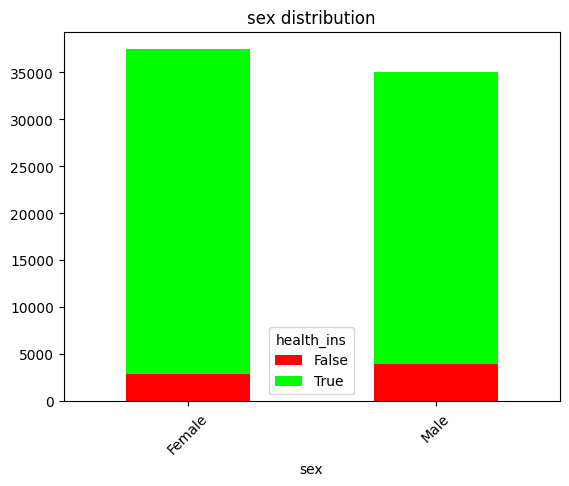

In [8]:
utils.plot_dist(feature='sex')

#### **2.3.2. Is employed**

##### **➜ Employed Statistics**

In [9]:
utils.print_stats(feature='is_employed')

| Label | Count | Percentage |
| --- | --- | --- |
| True | 44630 | 61.59 % |
| Missing | 25515 | 35.21 % |
| False | 2313 | 3.19 % |


##### **➜ Employed Distribution**

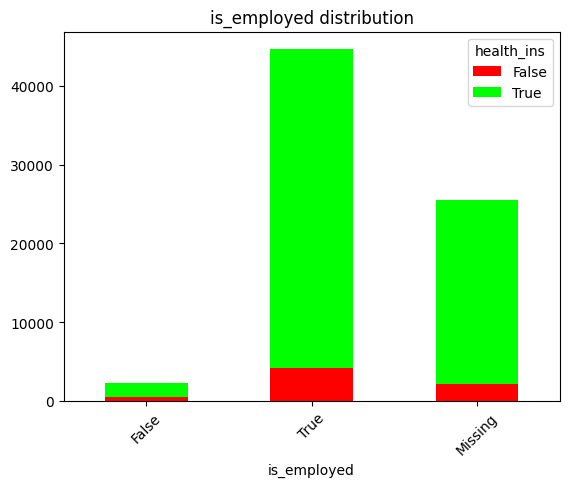

In [10]:
utils.plot_dist(feature='is_employed')

#### **2.3.3. Income**

##### **➜ Income Statistics**

In [11]:
utils.print_numeric_stats(feature='income')

| Statistics | Value |
| --- | --- |
| Mean | 41881.43 |
| Standard Deviation | 58274.60 |
| Minimum | -6900.00 |
| 25th percentile | 10700.00 |
| Median | 26400.00 |
| 75th percentile | 52000.00 |
| Maximum | 1257000.00 || IQR | 41300.00 || Skewness | 4.87 || Kurtosis | 37.94 || NA values | 0 |

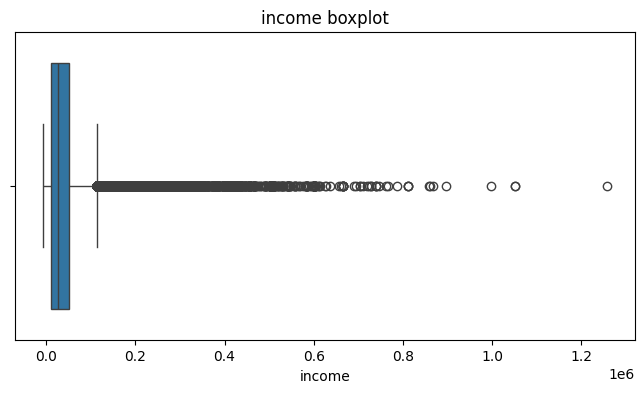

In [12]:
utils.plot_stats('income')

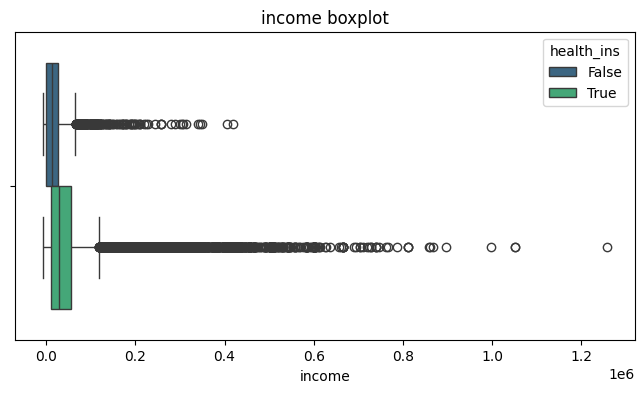

In [13]:
utils.plot_stats('income', with_target_value=True)

##### **➜ Income Distribution**

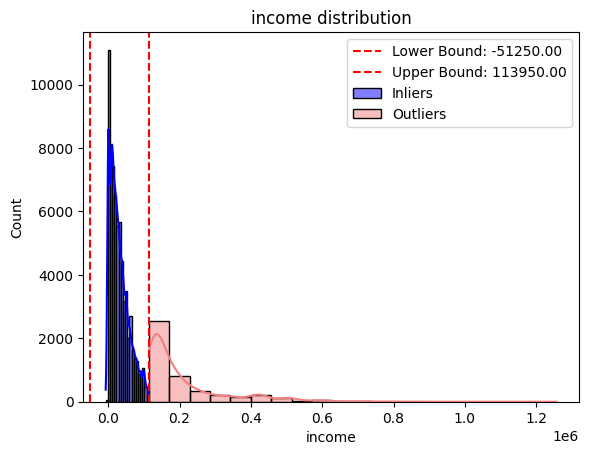

In [14]:
utils.plot_numeric_dist('income')

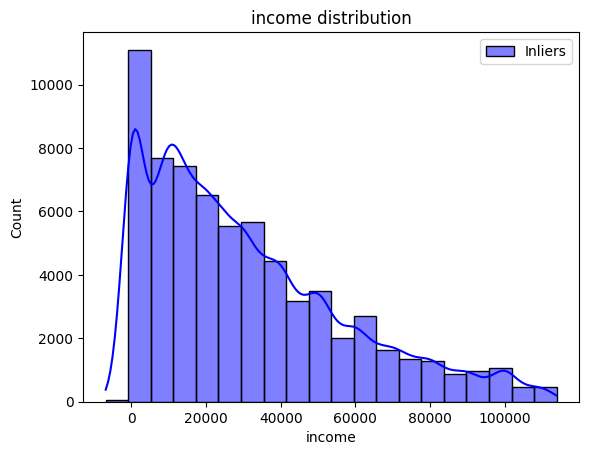

In [15]:
utils.plot_numeric_dist('income', plot_outliers=False)

#### **2.3.4. Marital status**

##### **➜ Marital status Statistics**

In [16]:
utils.print_stats(feature='marital_status')

| Label | Count | Percentage |
| --- | --- | --- |
| Married | 38040 | 52.50 % |
| Never married | 19120 | 26.39 % |
| Divorced/Separated | 10572 | 14.59 % |
| Widowed | 4726 | 6.52 % |


##### **➜ Marital status Distribution**

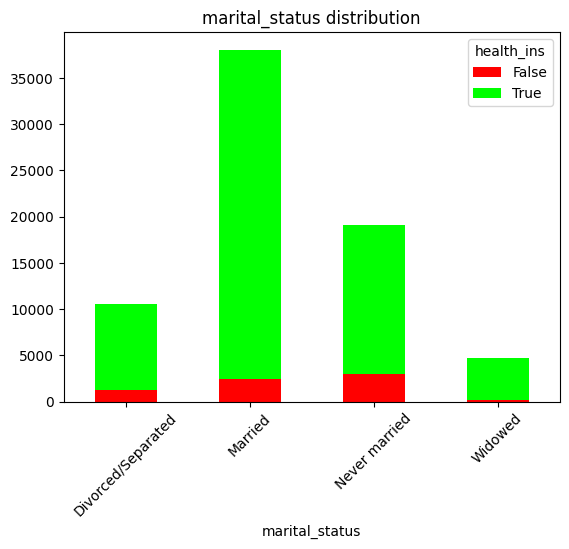

In [17]:
utils.plot_dist(feature='marital_status')

#### **2.3.5. Health insurance**

##### **➜ Health insurance Statistics**

In [18]:
utils.print_stats(feature='health_ins')

| Label | Count | Percentage |
| --- | --- | --- |
| True | 65553 | 90.47 % |
| False | 6905 | 9.53 % |


##### **➜ Health insurance Distribution**

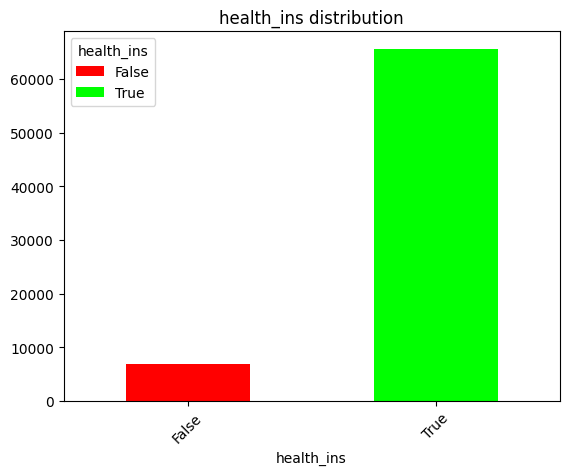

In [19]:
utils.plot_dist(feature='health_ins')

#### **2.3.6. Housing type**

##### **➜ Housing type Statistics**

In [20]:
utils.print_stats(feature='housing_type')

| Label | Count | Percentage |
| --- | --- | --- |
| Homeowner with mortgage/loan | 31092 | 42.91 % |
| Rented | 21956 | 30.30 % |
| Homeowner free and clear | 16604 | 22.92 % |
| Missing | 1686 | 2.33 % |
| Occupied with no rent | 1120 | 1.55 % |


##### **➜ Housing type Distribution**

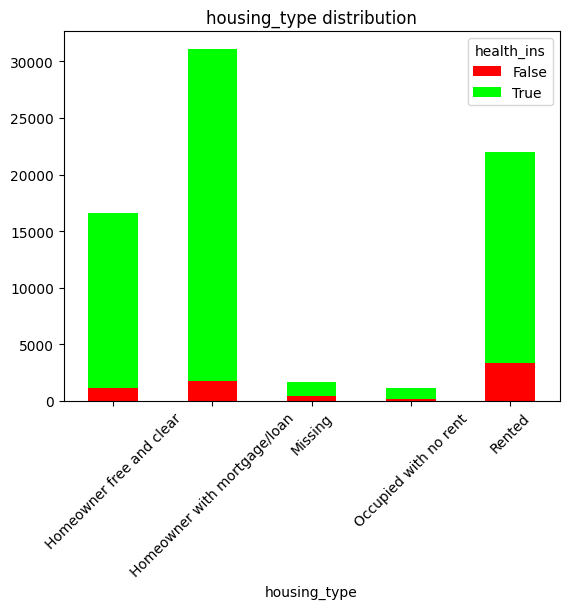

In [21]:
utils.plot_dist(feature='housing_type')

#### **2.3.7. Number of vehicles**

##### **➜ Number of vehicles Statistics**

In [22]:
utils.print_stats(feature='num_vehicles')

| Label | Count | Percentage |
| --- | --- | --- |
| 2.0 | 28052 | 38.71 % |
| 1.0 | 17445 | 24.08 % |
| 3.0 | 13094 | 18.07 % |
| 4.0 | 5100 | 7.04 % |
| 0.0 | 4636 | 6.40 % |
| Missing | 1686 | 2.33 % |
| 5.0 | 1628 | 2.25 % |
| 6.0 | 817 | 1.13 % |


##### **➜ Number of vehicles Distribution**

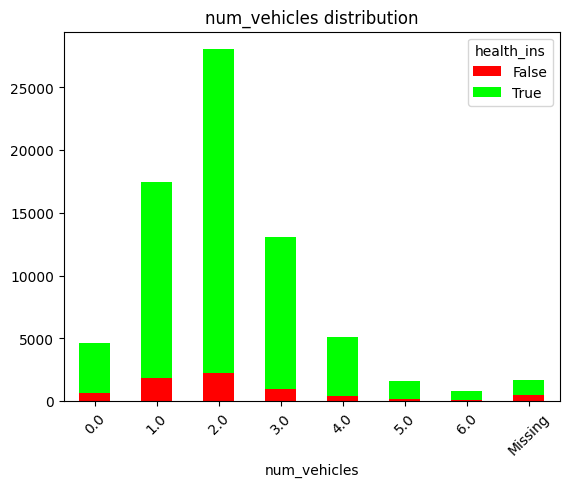

In [23]:
utils.plot_dist(feature='num_vehicles')

#### **2.3.8. Age**

##### **➜ Age Statistics**

In [24]:
utils.print_numeric_stats('age')

| Statistics | Value |
| --- | --- |
| Mean | 49.21 |
| Standard Deviation | 18.09 |
| Minimum | 0.00 |
| 25th percentile | 34.00 |
| Median | 48.00 |
| 75th percentile | 62.00 |
| Maximum | 120.00 || IQR | 28.00 || Skewness | 0.38 || Kurtosis | -0.39 || NA values | 0 |

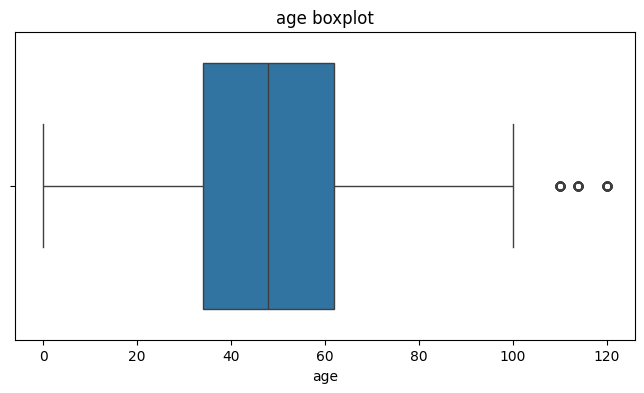

In [25]:
utils.plot_stats('age')

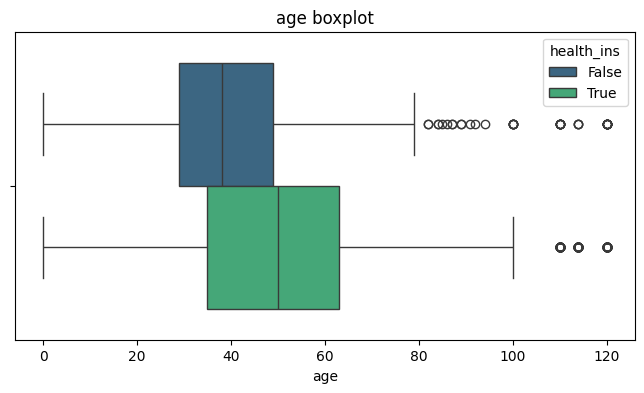

In [26]:
utils.plot_stats('age', with_target_value=True)

##### **➜ Age Distribution**

Most of the customers are young or early 40s, between 18 and 45 years old.

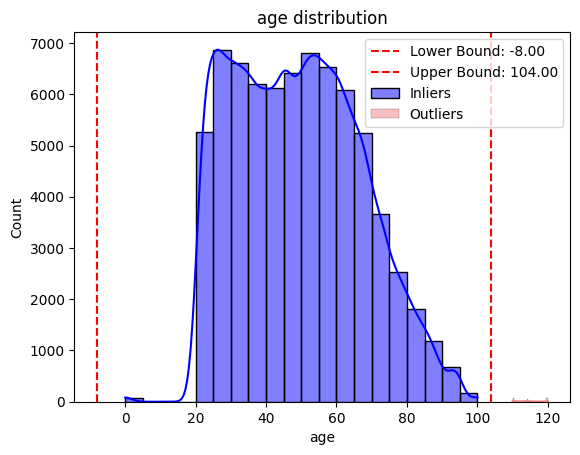

In [27]:
utils.plot_numeric_dist('age')

#### **2.3.9. State of residence**

##### **➜ State of residence Statistics**

In [28]:
utils.print_stats('state_of_res')

| Label | Count | Percentage |
| --- | --- | --- |
| California | 8870 | 12.24 % |
| Texas | 5938 | 8.20 % |
| Florida | 4921 | 6.79 % |
| New York | 4375 | 6.04 % |
| Pennsylvania | 2968 | 4.10 % |
| Illinois | 2896 | 4.00 % |
| Ohio | 2587 | 3.57 % |
| North Carolina | 2329 | 3.21 % |
| Michigan | 2246 | 3.10 % |
| Georgia | 2177 | 3.00 % |
| New Jersey | 2035 | 2.81 % |
| Virginia | 1922 | 2.65 % |
| Washington | 1663 | 2.30 % |
| Massachusetts | 1635 | 2.26 % |
| Arizona | 1510 | 2.08 % |
| Tennessee | 1489 | 2.05 % |
| Indiana | 1452 | 2.00 % |
| Missouri | 1388 | 1.92 % |
| Maryland | 1324 | 1.83 % |
| Wisconsin | 1294 | 1.79 % |
| Colorado | 1274 | 1.76 % |
| Minnesota | 1214 | 1.68 % |
| South Carolina | 1167 | 1.61 % |
| Louisiana | 1085 | 1.50 % |
| Alabama | 1037 | 1.43 % |
| Oregon | 942 | 1.30 % |
| Kentucky | 923 | 1.27 % |
| Oklahoma | 889 | 1.23 % |
| Connecticut | 827 | 1.14 % |
| Iowa | 702 | 0.97 % |
| Nevada | 665 | 0.92 % |
| Mississippi | 659 | 0.91 % |
| Utah | 657 | 0.91 % |
| Arkansas | 646 | 0.89 % |
| Kansas | 638 | 0.88 % |
| West Virginia | 416 | 0.57 % |
| Nebraska | 402 | 0.55 % |
| New Mexico | 399 | 0.55 % |
| Hawaii | 354 | 0.49 % |
| Idaho | 328 | 0.45 % |
| Maine | 319 | 0.44 % |
| New Hampshire | 305 | 0.42 % |
| Rhode Island | 218 | 0.30 % |
| Montana | 216 | 0.30 % |
| Delaware | 198 | 0.27 % |
| South Dakota | 186 | 0.26 % |
| North Dakota | 169 | 0.23 % |
| District of Columbia | 168 | 0.23 % |
| Alaska | 160 | 0.22 % |
| Vermont | 146 | 0.20 % |
| Wyoming | 130 | 0.18 % |


##### **➜ State of residence Distribution**

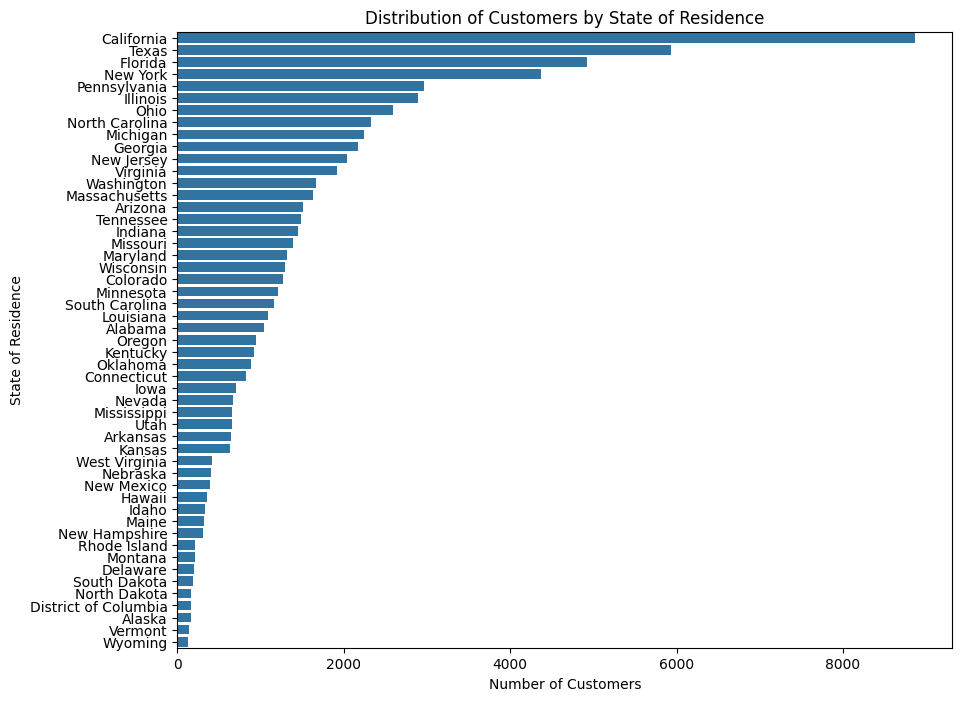

In [29]:
plt.figure(figsize=(10, 8))
sns.countplot(y='state_of_res', data=df, order=df['state_of_res'].value_counts().index)
plt.title('Distribution of Customers by State of Residence')
plt.xlabel('Number of Customers')
plt.ylabel('State of Residence')
plt.show()

#### **2.3.10. Gas usage**

##### **➜ Gas usage Statistics**

In [30]:
utils.print_numeric_stats('gas_usage')

| Statistics | Value |
| --- | --- |
| Mean | 41.23 |
| Standard Deviation | 63.15 |
| Minimum | 1.00 |
| 25th percentile | 3.00 |
| Median | 10.00 |
| 75th percentile | 60.00 |
| Maximum | 570.00 || IQR | 57.00 || Skewness | 3.03 || Kurtosis | 13.03 || NA values | 1686 |

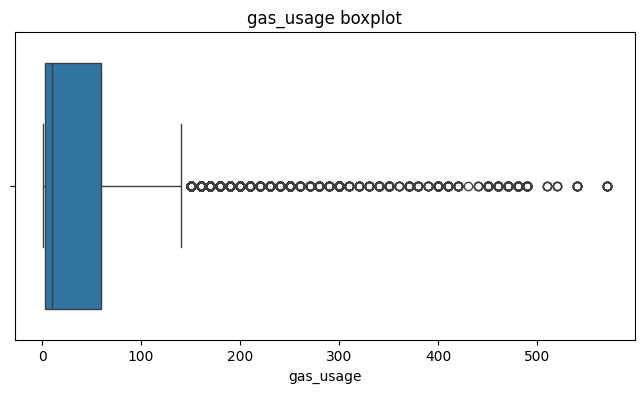

In [31]:
utils.plot_stats('gas_usage')

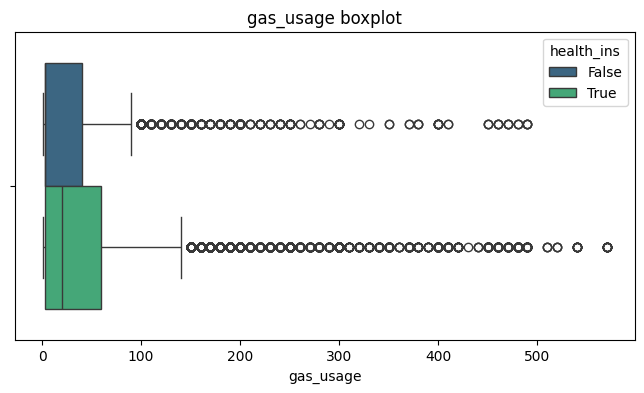

In [32]:
utils.plot_stats('gas_usage', with_target_value=True)

##### **➜ Gas usage Distribution**

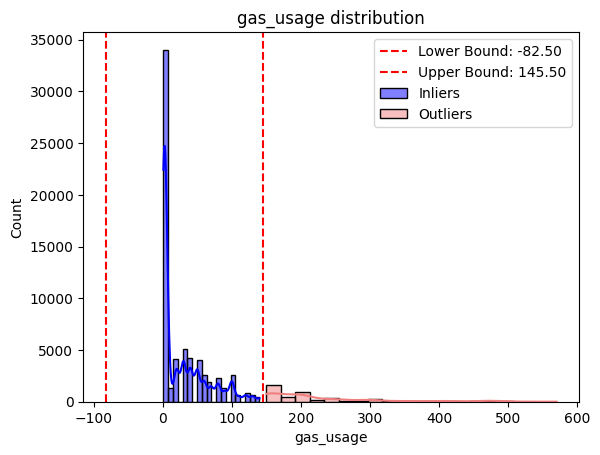

In [33]:
utils.plot_numeric_dist('gas_usage')

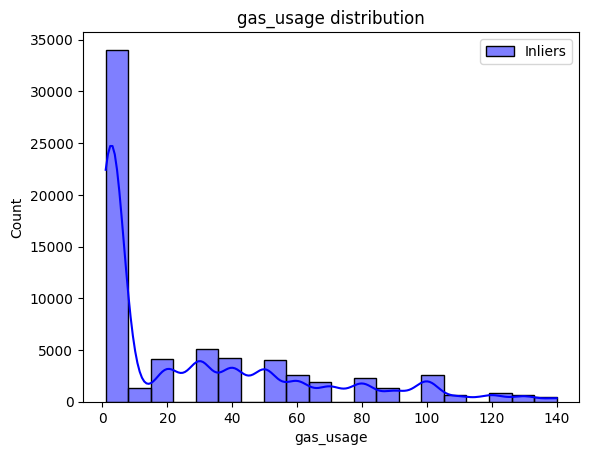

In [34]:
utils.plot_numeric_dist('gas_usage', plot_outliers=False)

#### **2.3.11. Rooms**

##### **➜ Rooms Statistics**

In [35]:
utils.print_stats('rooms')

| Label | Count | Percentage |
| --- | --- | --- |
| 2 | 12230 | 16.88 % |
| 3 | 12134 | 16.75 % |
| 5 | 12098 | 16.70 % |
| 1 | 12042 | 16.62 % |
| 6 | 11999 | 16.56 % |
| 4 | 11955 | 16.50 % |


##### **➜ Rooms Distribution**

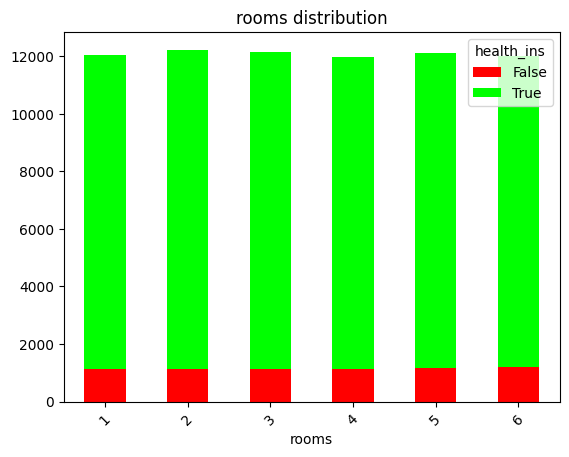

In [36]:
utils.plot_dist('rooms')

#### **2.3.12. Recent move**

##### **➜ Recent move Statistics**

In [37]:
utils.print_stats('recent_move_b')

| Label | Count | Percentage |
| --- | --- | --- |
| F | 61773 | 85.25 % |
| T | 8998 | 12.42 % |
| Missing | 1687 | 2.33 % |


##### **➜ Recent move Distribution**

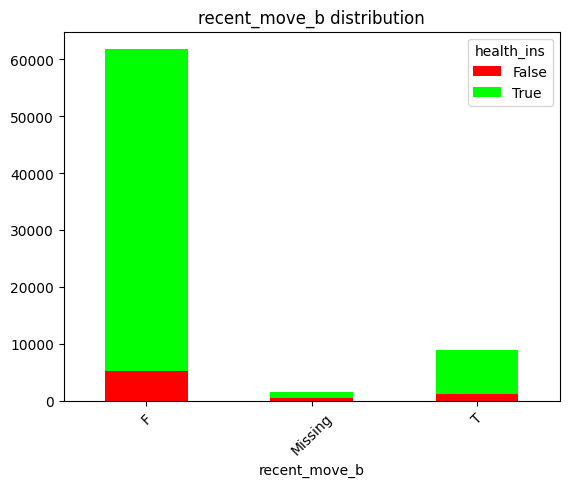

In [38]:
utils.plot_dist('recent_move_b')

## 3. Data Preparation

### 3.1. Data Selection



#### 3.1.1. Customer ID

The customer ID should not be used to train models as it is a unique value for each customer as well as potentially being sensitive information.

In [39]:
df.drop(columns='Unnamed: 0', inplace=True)

#### 3.1.2. State of Residence and Code Column

In [40]:
# Find states with more than one unique code_column
states_with_multiple_codes = df.groupby('state_of_res')['code_column'].nunique()
states_with_multiple_codes = states_with_multiple_codes[states_with_multiple_codes > 1]

# Display the result
print(states_with_multiple_codes)

Series([], Name: code_column, dtype: int64)



Both attributes are directly associated, each State has a unique code. The code column can be dropped.

In [41]:
df.drop(columns='code_column', inplace=True)

In [42]:
df.head(10)

,custid,sex,is_employed,income,marital_status,health_ins,housing_type,num_vehicles,age,state_of_res,gas_usage,rooms,recent_move_b
0,000006646_03,Male,True,22000.0,Never married,True,Homeowner free and clear,0.0,24,Alabama,210.0,3,F
1,000007827_01,Female,NaN,23200.0,Divorced/Separated,True,Rented,0.0,82,Alabama,3.0,6,T
2,000008359_04,Female,True,21000.0,Never married,True,Homeowner with mortgage/loan,2.0,31,Alabama,40.0,3,F
3,000008529_01,Female,NaN,37770.0,Widowed,True,Homeowner free and clear,1.0,93,Alabama,120.0,2,F
4,000008744_02,Male,True,39000.0,Divorced/Separated,True,Rented,2.0,67,Alabama,3.0,2,F
5,000011466_01,Male,NaN,11100.0,Married,True,Homeowner free and clear,2.0,76,Alabama,200.0,6,F
6,000015018_01,Female,True,25800.0,Married,False,Rented,2.0,26,Alabama,3.0,3,F
7,000017314_02,Female,NaN,34600.0,Married,True,Homeowner free and clear,2.0,73,Alabama,50.0,5,F
8,000017383_04,Female,True,25000.0,Never married,True,Homeowner free and clear,5.0,27,Alabama,3.0,4,F
9,000017554_02,Male,True,31200.0,Married,True,Homeowner with mortgage/loan,3.0,54,Alabama,20.0,6,F


### 3.2. Data Cleaning

#### 3.2.1. Drop rows

In [73]:
rows_with_missing = df.isnull().sum(axis=1) > 2

df.drop(df[rows_with_missing].index, inplace=True)

# drop rows with age == 0 or age == 120
df = df[df["age"] != 0]
df = df[df["age"] != 120]

In [74]:
df[(df['age'] == 0)].health_ins.value_counts()

Series([], Name: count, dtype: int64)

#### 3.2.2. Replace Nulls

In [ ]:
df['is_employed'] = df['is_employed'].fillna(False)
df.head()

### 3.3. Data Construction

#### 3.3.1. Gas Usage and categories

According to the data dictionary provided, the values of the gas usage attribute include some information beyond the actual monthly billing amount.

50.0


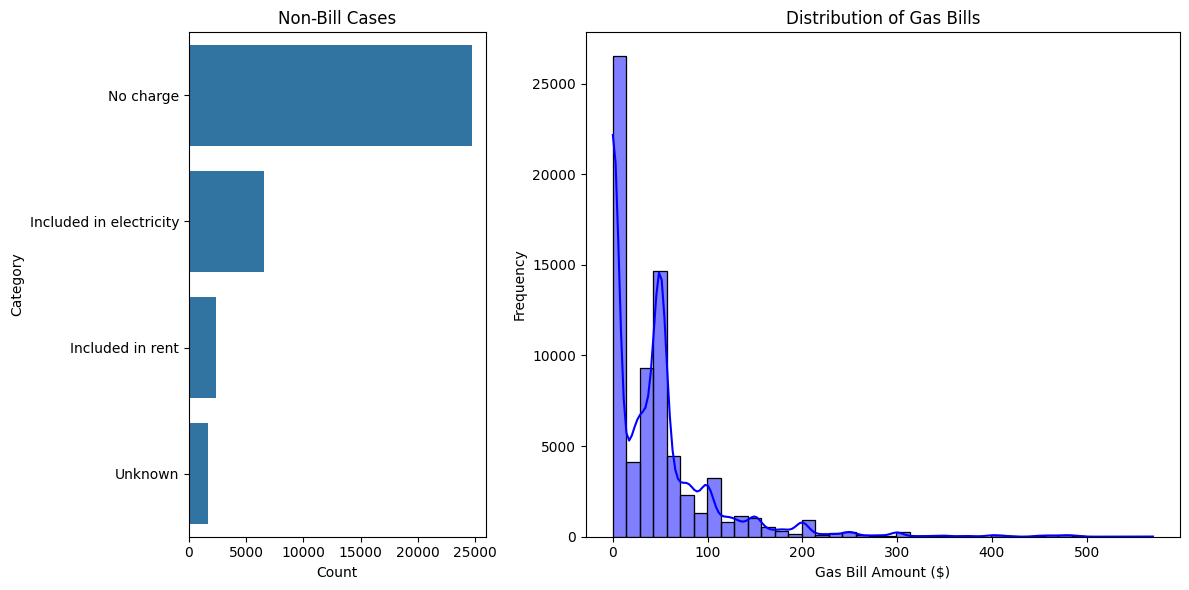

In [43]:
# Preprocess the data
gas_median = df[df['gas_usage']> 3].gas_usage.median()

print(gas_median)

non_bill_cases_values = {
    1: gas_median,
    2: gas_median,
    3: 0
}
non_bill_cases = {
    1: 'Included in rent', 
    2: 'Included in electricity', 
    3: 'No charge'
}

# New feature for gas usage category
df['gas_category'] = df['gas_usage'].replace(non_bill_cases).where(
    df['gas_usage'].isin(non_bill_cases.keys()), 'Actual Bill'
)
df.loc[pd.isna(df['gas_usage']), 'gas_category'] = 'Unknown'

# Replace non-bill cases' values or maintain if not included
df['gas_usage'] = df['gas_usage'].replace(non_bill_cases_values)
df['gas_usage'] = df['gas_usage'].fillna(gas_median)

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 6), gridspec_kw={'width_ratios': [1, 2]})

# Bar chart for non-bill cases
non_bills = df[df['gas_category'] != 'Actual Bill']
non_bill_counts = non_bills['gas_category'].value_counts()
sns.barplot(x=non_bill_counts.values, y=non_bill_counts.index, ax=axes[0])
axes[0].set_title('Non-Bill Cases')
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Category')

# Histogram for actual bills
sns.histplot(df['gas_usage'], bins=40, kde=True, ax=axes[1], color='blue')
axes[1].set_title('Distribution of Gas Bills')
axes[1].set_xlabel('Gas Bill Amount ($)')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

#### **x.x.x. Income by age group**

##### **➜ Scatterplot**

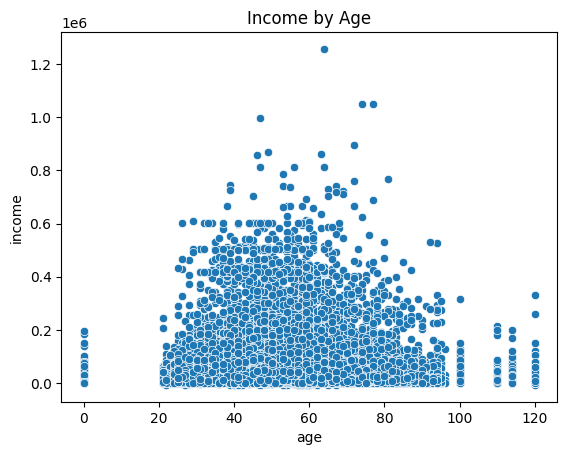

In [44]:
sns.scatterplot(x='age', y='income', data=df)
plt.title('Income by Age')
plt.show()

##### **➜ Boxplot**

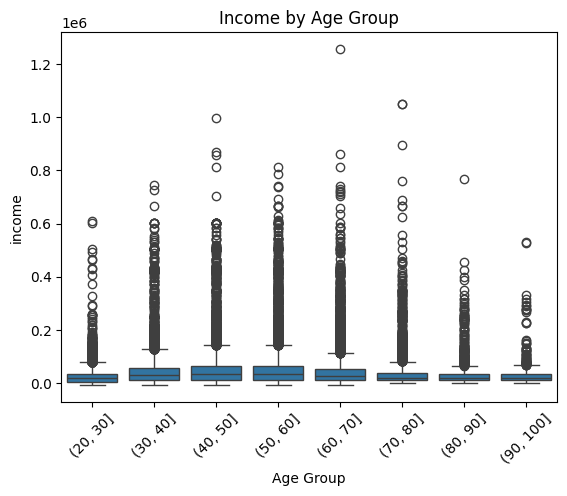

In [45]:
sns.boxplot(x=pd.cut(df['age'], bins=[20, 30, 40, 50, 60, 70, 80, 90, 100]), y='income', data=df)
plt.title('Income by Age Group')
plt.xlabel('Age Group')
plt.xticks(rotation=45)
plt.show()


#### **x.x.x. Probability of health insurance by age**

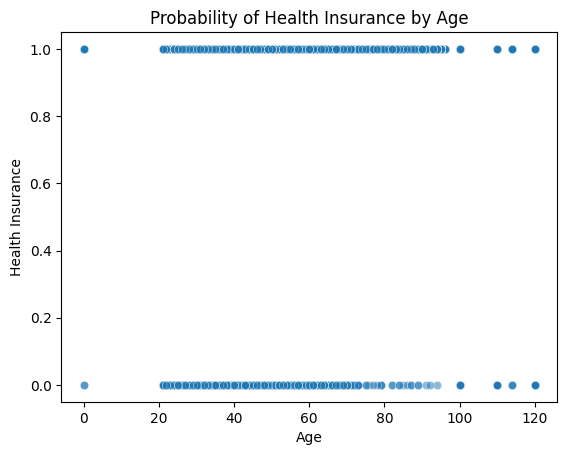

In [46]:
sns.scatterplot(x='age', y='health_ins', data=df, alpha=0.5)
plt.title('Probability of Health Insurance by Age')
plt.xlabel('Age')
plt.ylabel('Health Insurance')
plt.show()

#### **x.x.x. Marital status by housing type**

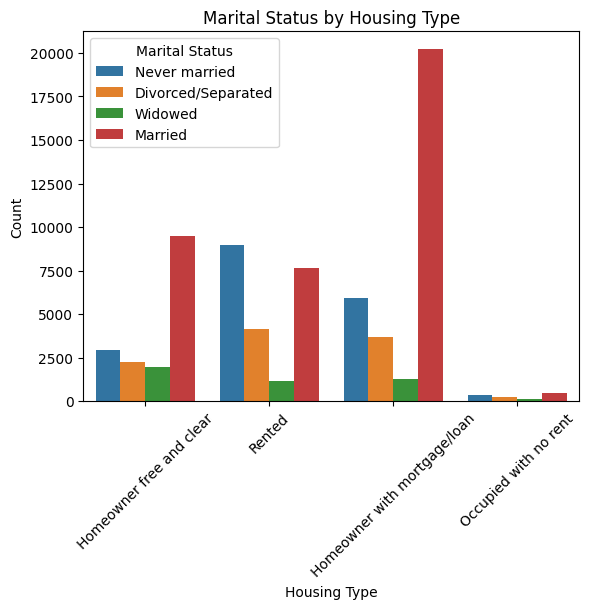

In [47]:
sns.countplot(x='housing_type', hue='marital_status', data=df)
plt.title('Marital Status by Housing Type')
plt.xlabel('Housing Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Marital Status')
plt.show()

#### **x.x.x. Health insurance by marital status**

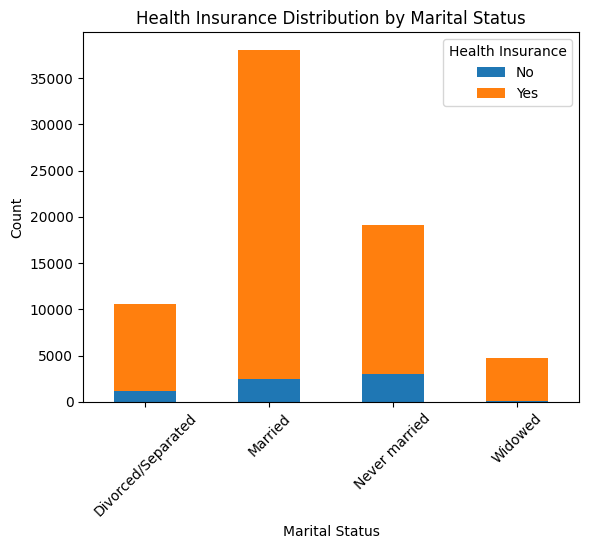

In [48]:
pd.crosstab(df['marital_status'], df['health_ins']).plot(kind='bar', stacked=True)
plt.title('Health Insurance Distribution by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.legend(title='Health Insurance', labels=['No', 'Yes'])
plt.xticks(rotation=45)
plt.show()

#### **x.x.x. Correlation Matrix**

##### **➜ Correlation of rooms, housing_type_num, gas_usage**

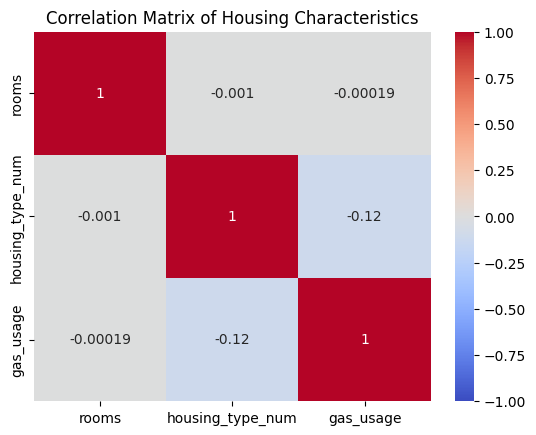

In [49]:
df['housing_type_num'] = df['housing_type'].astype('category').cat.codes

correlation_matrix = df[['rooms', 'housing_type_num', 'gas_usage']].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Housing Characteristics')
plt.show()

##### **➜ Correlation of numerical features**

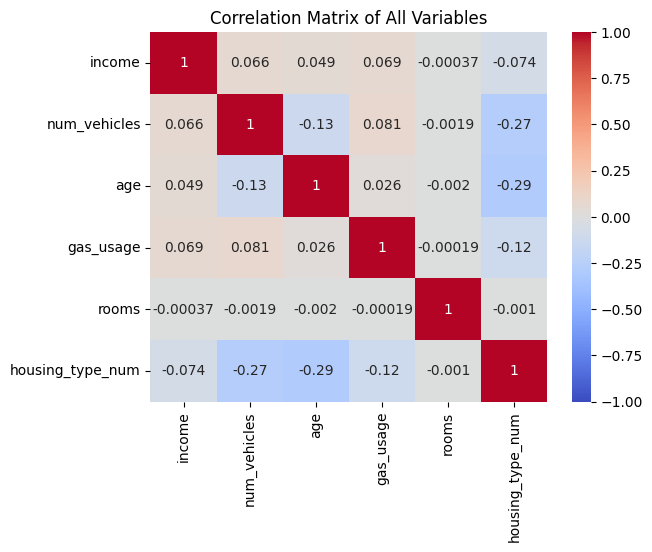

In [50]:

numeric_df = df.select_dtypes(include=[np.number])

correlation_matrix_all = numeric_df.corr()

sns.heatmap(correlation_matrix_all, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of All Variables')
plt.show()

# como proceder com as variaveis categoricas?

## 4. Modelling

### 4.1. Decision Tree Classifier

In [51]:
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn import metrics


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72458 entries, 0 to 72457
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   custid            72458 non-null  object 
 1   sex               72458 non-null  object 
 2   is_employed       46943 non-null  object 
 3   income            72458 non-null  float64
 4   marital_status    72458 non-null  object 
 5   health_ins        72458 non-null  bool   
 6   housing_type      70772 non-null  object 
 7   num_vehicles      70772 non-null  float64
 8   age               72458 non-null  int64  
 9   state_of_res      72458 non-null  object 
 10  gas_usage         72458 non-null  float64
 11  rooms             72458 non-null  int64  
 12  recent_move_b     70771 non-null  object 
 13  gas_category      72458 non-null  object 
 14  housing_type_num  72458 non-null  int8   
dtypes: bool(1), float64(3), int64(2), int8(1), object(8)
memory usage: 7.3+ MB


In [53]:
# Define feature columns
categorical_one_hot = ['sex','marital_status', 'housing_type', 'gas_category', 'recent_move_b'] 
categorical_label = ['state_of_res']  # Use label encoding
numerical = ['income', 'num_vehicles', 'age', 'gas_usage', 'rooms']  

# One-hot encode selected categorical variables
df_one_hot = pd.get_dummies(df[categorical_one_hot], drop_first=True)

# Label encode other categorical variables
label_encoders = {}  # To store the LabelEncoders for inverse transforming if needed
for col in categorical_label:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])  # Transform the column
    label_encoders[col] = le

# Combine the transformed categorical and numerical data
X = pd.concat([df[numerical], df_one_hot, df[categorical_label]], axis=1)

y = df.health_ins # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y) # 70% training and 30% test

In [67]:
df_one_hot

,sex_Male,marital_status_Married,marital_status_Never married,marital_status_Widowed,housing_type_Homeowner with mortgage/loan,housing_type_Occupied with no rent,housing_type_Rented,gas_category_Included in electricity,gas_category_Included in rent,gas_category_No charge,gas_category_Unknown,recent_move_b_T
0,True,False,True,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,True,False,True
2,False,False,True,False,True,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
72453,False,False,True,False,False,False,True,False,False,False,False,False
72454,False,False,False,True,False,False,False,False,False,False,False,False
72455,True,True,False,False,True,False,False,False,False,False,False,False
72456,False,False,False,False,False,False,False,False,False,False,False,False


In [54]:
dt_classifier = DecisionTreeClassifier(class_weight='balanced', max_depth=20, random_state=1)

# Train Decision Tree Classifer
dt_classifier = dt_classifier.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = dt_classifier.predict(X_test)


In [55]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.8053178765295795
